# Project 2: Hawkes Process
# Group W: Khair Mohamed - El Firdoussi Aymane - Msik Ahmed Amine

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.optimize import minimize, root_scalar

# All imports go here

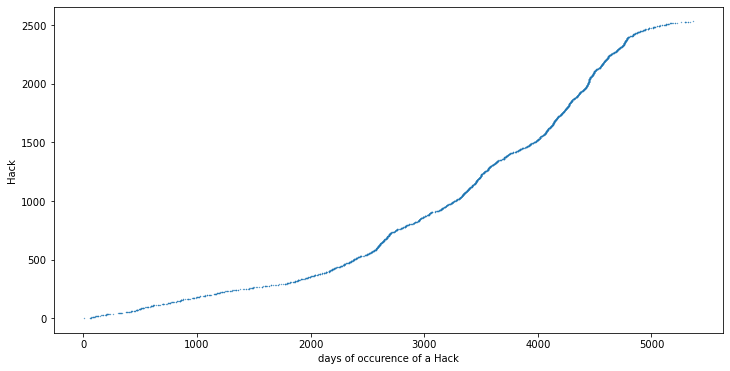

In [37]:
# Loading the data set
df = pd.read_csv("PRC.csv", sep=';')

# Taking the dates of HACKs
dff = df.loc[ df['Type of breach'] == "HACK", 'Date Made Public'] 
dff = dff.apply( lambda x:datetime.strptime(x, '%m/%d/%Y')) 

# Making the first date as 0
debut = min(dff) 
dff = dff - debut
dff = dff.apply(lambda x:x.days).sort_values()

# Sorting by date
l = np.asarray(dff)[1:]

# Plotting the 
plt.figure(figsize = (12, 6))
plt.scatter(l, 1 + np.arange(len(l)), s=0.1)
plt.xlabel("days of occurence of a Hack")
plt.ylabel("Hack")

plt.show()

## Log-likelihood

In [54]:
def log_likelihood(T, t, alpha, beta, gamma):
    logL = (1 - alpha) * t
    i = 0
    n = len(T)
    while i < n and T[i] < t:
        logL += beta * ( 1 - np.exp(-gamma * (t - T[i]))) /gamma
        s = 0
        for j in range(i):
            s+= beta* np.exp(-gamma * (T[i] - T[j]))
            
        logL += np.log(alpha + s)
        i += 1
    return logL

In [52]:
print(log_likelihood(l, 100000, 1, 1, 1))

4026.6054476769727


## Finding the parameters that maximize the log-likelihood

Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood, i.e:

$$ \arg \max_{\alpha, \beta, \gamma} \log(L(N, t)) =  \arg \min_{\alpha, \beta, \gamma} \: -\log(L(N, t))  $$

In [118]:
# Function to minimize 
def negative_log_likelihood(param, T, t):
    return  -log_likelihood(T, t, param[0], param[1], param[2])
def log_likelihoodd(param):
    return  -log_likelihood(l, 1000, param[0], param[1], param[2])

In [127]:
# Paramaters
x0 = (100, 1, 1)
epsilon = 1e-6
T = l
t = 1000

# Optimization
res = minimize(negative_log_likelihood, x0, method='SLSQP', args = (T, t), bounds = ((epsilon, None), (epsilon, None), (epsilon, None)) , tol = 1e-25)
print("the optimal parameters are ",res.x)
print("the maximum is :", -negative_log_likelihood(res.x, T, t)) 

the optimal parameters are  [9.99999997e-07 1.77448242e+02 1.00000000e-06]
the maximum is : 14535540.716243377


In [130]:
# Paramaters
x0 = (100, 1, 1)
epsilon = 1e-6
T = l
t = 1000

# Optimization
res = minimize(negative_log_likelihood, x0, method='SLSQP', args = (T, t), bounds = ((epsilon, None), (epsilon, None), (epsilon, None)) , options= {'maxiter' : 10000000})
print("the optimal parameters are ",res.x)
print("the maximum is :", -negative_log_likelihood(res.x, T, t)) 

the optimal parameters are  [9.99999997e-07 1.77448242e+02 1.00000000e-06]
the maximum is : 14535540.716243377


In [113]:
# Optimization
x0 = (1, 1, 1)
epsilon = 1e-6
res = minimize(log_likelihoodd, x0, method='SLSQP',  bounds = ((epsilon, None), (epsilon, None), (epsilon, None)) , tol=1e-6)
print("the optimal parameters are ",res.x)
print("the maximum is :", -log_likelihoodd(res.x)) 

the optimal parameters are  [1.15474741e-01 4.40997086e+04 1.00000000e-06]
the maximum is : 88206.01559939048


In [109]:
x0 = (1, 10, 1)
epsilon = 1e-6
res = minimize(log_likelihoodd, x0, method='SLSQP',  bounds = ((epsilon, None), (epsilon, None), (epsilon, None)) , tol=1e-15)
print("the optimal parameters are ",res.x)
print("the maximum is :", -log_likelihoodd(res.x)) 

the optimal parameters are  [1.81296832e-06 1.92384766e+02 2.69043153e-06]
the maximum is : 15750549.387789845


In [110]:
x0 = (10, 10, 10)
epsilon = 1e-6
res = minimize(log_likelihoodd, x0, method='SLSQP',  bounds = ((epsilon, None), (epsilon, None), (epsilon, None)) , tol=1e-15)
print("the optimal parameters are ",res.x)
print("the maximum is :", -log_likelihoodd(res.x)) 

the optimal parameters are  [9.99999999e-07 2.88967285e+01 9.99999999e-07]
the maximum is : 2368933.7167158555
